### Required imports

In [2]:
import numpy as np
import scipy.special
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

### Set your student number as random seed

In [3]:
np.random.seed(400201167)

### Possion process parameter (lambda) is 0.1 for all experiments except "Random Splitting" section and is stored in variable l.

In [4]:
l = 0.1

In [5]:
# Matplotlib settings
plt.style.use(['dark_background'])
plt.rc('axes', facecolor='k')
plt.rc('figure', facecolor='k')

# Generate Poisson Process

1. Generate a poisson process with 100 samples.
2. Plot the points. 

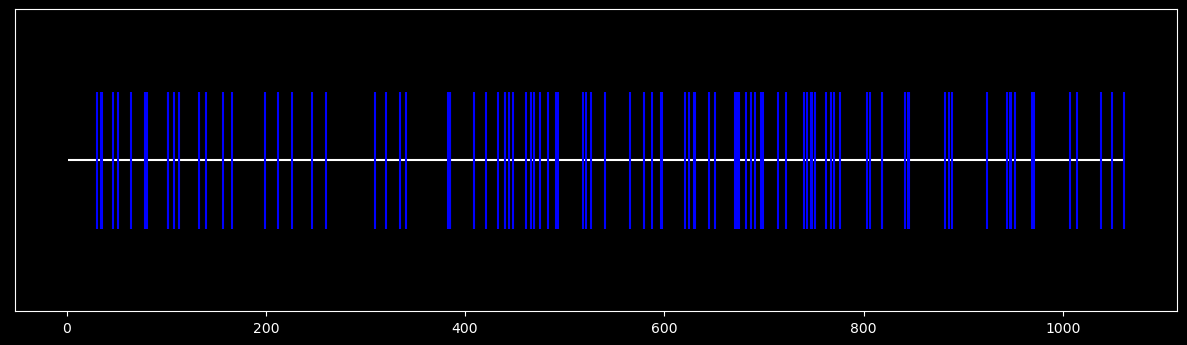

In [6]:
# Generate process
X = np.random.exponential(1/l, 100)
S = np.cumsum(X)

# Plot process events
plt.rc('figure', figsize=(15, 4), dpi=100)
plt.hlines(1, 1, S[-1]+1)
plt.eventplot(S, orientation='horizontal', colors='blue')
plt.grid(False)
fig = plt.gca()
yaxis = fig.axes.get_yaxis()
yaxis.set_visible(False)
plt.show()

# Distribution of number of samples in arbitrary intervals

### Expectation of number of samples

1. Generate a poission process consisting of 10000 samples.
2. Compute number of points in 1000 random intevals
3. Draw the graph of number of samples w.r.t. interval length
4. Conclude the relationship between expectation of number of samples and interval length.

<b><span style='color:green'>From the plot below we understand that there is a linear relationship between number of poisson events and the interval length.
Expected number of poisson events in an interval equals interval length times some constant.
The constant is the poisson rate (lambda)</span><b>

Process Interval: (0, 100925)


Text(0.5, 0, 'Interval length')

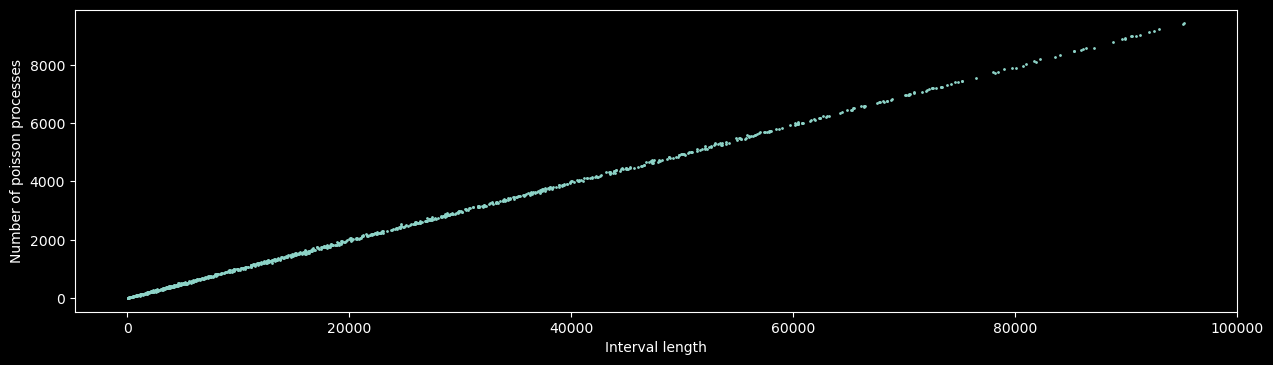

In [7]:
# Generate process
X = np.random.exponential(1/l, 10000)
S = np.cumsum(X)
process_interval = (0, int(S[-1]+1))
print('Process Interval:', process_interval)

# Compute number of points in random intervals
interval_start = np.random.uniform(process_interval[0], process_interval[1], 1000)
interval_lengths = []
counts = []
for i in range(1000):
    start = interval_start[i]
    end = np.random.uniform(start, process_interval[1], 1)[0]
    count = np.sum((S < end) * (S > start))
    interval_lengths.append(end - start)
    counts.append(count)

# Plot number of events wrt interval length
plt.rc('figure', figsize=(15, 4), dpi=100)
plt.scatter(interval_lengths, counts, s=1)
plt.grid(False)
plt.ylabel('Number of poisson processes')
plt.xlabel('Interval length')


### PDF of number samples 

1. Generate a poission process consisting of 10000 samples.
2. For each consecutive interval of length 100 compute the number of samples
3. Estimate the PDF
4. Compute the real PDF (possion distribution)
5. Compare estimated and real distributions in a single graph

Process Interval: (0, 99613)


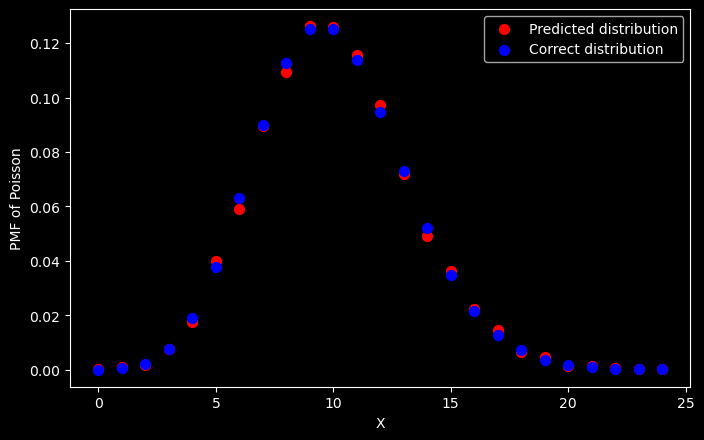

In [8]:
# Generate Process
X = np.random.exponential(1/l, 10000)
S = np.cumsum(X)
process_interval = (0, int(S[-1]+1))
print('Process Interval:', process_interval)

# Compute density (empirically)
interval_length = 100
counts_in_interval = []
for start in range(process_interval[1]-interval_length):
    count = np.sum((S < start + interval_length) * (S > start))
    counts_in_interval.append(count)
dic = Counter(counts_in_interval)
x1 = [i for i, _ in dic.items()]
temp = [j for _, j in dic.items()]
y1 = [i/sum(temp) for i in temp]            # Normalize to get a distribution

# Compute density (analytically)
x2 = np.arange(0, 25)
y2 = ((100 * l) ** x2) * np.exp(-(100 * l)) / scipy.special.factorial(x2)

# Plot
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.xlabel('X')
plt.ylabel('PMF of Poisson')
plt.scatter(x1, y1, s=50, c='r', label='Predicted distribution')
plt.scatter(x2, y2, s=50, c='b', label='Correct distribution')
plt.legend()
plt.grid(False)


# Expectation of the time of $i^{th}$ event.

1. Generate 1000 different poisson processes with 100 samples each.
2. Compute the average time of $i^{th}$ event for $1 \leq i \leq 100$
3. Compare the estimations with true expectations

$$
E[S_i]=E[S_{i-1} + X_i]=E[\Sigma_{j=1}^{i}{X_j}]=\Sigma_{j=1}^{i}{E[X_j]}=i/\lambda
$$

In [9]:
# Generate processes
X = np.random.exponential(1/l, (1000, 100))
S = np.cumsum(X, axis=1)

# Compute expectation and average
ith_average = np.mean(S, axis=0)
ith_true_expected = np.arange(1, 101) / l

# Print error
print('Absolute value of difference between average and expectation for all i\'s:')
print(np.abs(ith_average - ith_true_expected))

Absolute value of difference between average and expectation for all i's:
[0.25126534 0.22008522 0.52296393 0.37487025 0.44292434 0.52041643
 0.31452627 0.72036326 0.55240923 0.83781279 0.65475515 0.78901262
 0.97168925 1.43150954 1.40390401 1.30582615 1.44766238 1.56636684
 1.67423432 2.06441233 1.86258655 2.39037658 2.26512073 2.7655205
 3.19378795 2.91714704 2.80873388 2.54718297 2.45313729 2.73096931
 2.2992632  2.35340116 2.3048341  2.20661946 2.1940485  2.40808744
 2.1134544  2.51652041 2.13441184 2.00055118 1.22056635 1.30259143
 1.45173311 1.20891081 1.0233868  0.30334848 0.50328104 0.37165957
 0.20352229 1.05985398 1.195049   1.78931444 1.42986769 1.60735018
 1.5877572  1.51357815 1.27932081 1.58035654 0.98748679 1.4100671
 1.27625126 1.00637542 1.12459404 2.16120758 2.36554003 2.49411726
 2.6597412  3.17873703 3.01116938 3.05996501 3.00316046 2.91791283
 2.6923697  2.20180482 2.43614483 2.70315144 2.54547615 2.42211246
 2.33520779 2.496145   2.48894753 2.01743548 1.86927309 2

# Random Splitting

1. Load Poission process from poisson_sample.npy (consists of time of events).
2. Estimate the parameter of the process.
3. Generate Poisson processes with parameter=0.2, 1, 5 with random splitting. (with the same number of events as the given process)
4. Plot the genereted processes and store them as possion_{parameter_value}.npy.

Estimated lambda: 12.718275485037118


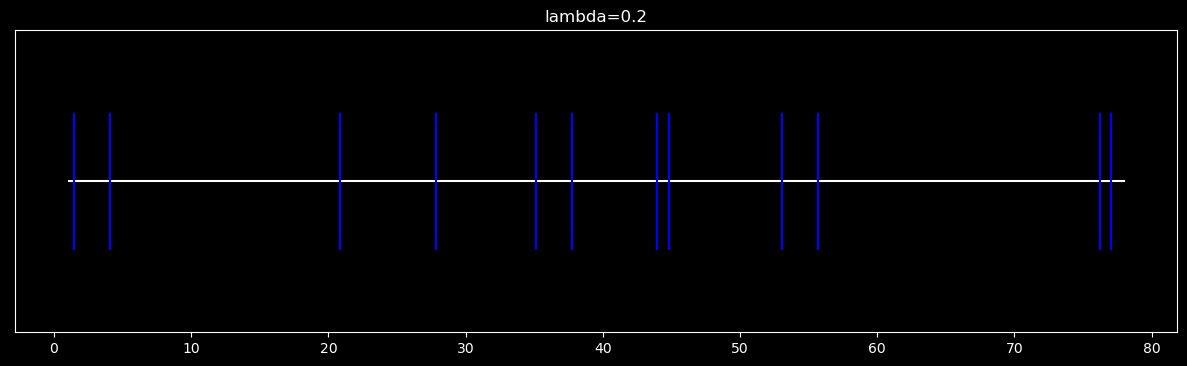

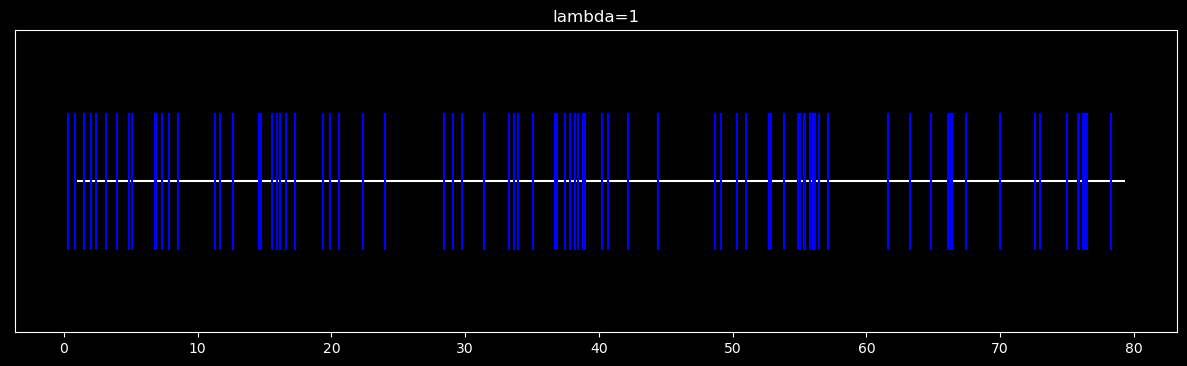

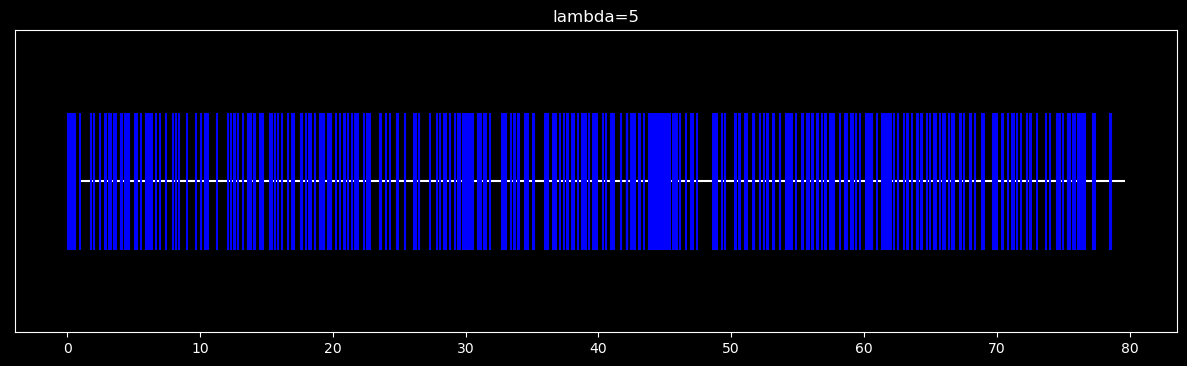

In [13]:
# Load poisson process
ps = np.load('poisson_sample.npy')

# Estimate lambda
estimated_lambda = ps.shape[0] / (ps[-1] - ps[0])
print('Estimated lambda:', estimated_lambda)

# Generate, plot and save processes
lambdas = [0.2, 1, 5]
for lam in lambdas:
    mask = np.random.uniform(0, 1, ps.shape[0])
    S = ps * (mask <= lam / estimated_lambda)
    S = S[S.nonzero()]
    np.save('poisson_{}'.format(lam), S)
    plt.figure()
    plt.rc('figure', figsize=(15, 4), dpi=100)
    plt.hlines(1, 1, S[-1]+1)
    plt.eventplot(S, orientation='horizontal', colors='blue')
    plt.grid(False)
    plt.title('lambda={}'.format(lam))
    fig = plt.gca()
    yaxis = fig.axes.get_yaxis()
    yaxis.set_visible(False)
    plt.show()
